# Problem Set 9

## Part II  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp

### Problem 1  

$$ \mathbf{F}(x,y) = \big(y^3-6y\big)\,\mathbf{i} + \big(6x - x^3\big)\,\mathbf{j}$$  

**a)**  Using Green's theorem, find the simple closed curve $C$ for which the integral $\displaystyle \oint_C\mathbf{F}\cdot\mathrm{d}\mathbf{r}$ (with positive oritentation) will have the largest positive value.  

$$ \mathrm{curl }\,\mathbf{F} = 6-3x^2 - 3y^2 + 6 = 12 - 3\big(x^2+y^2\big) $$

$$ \mathrm{curl }\,\mathbf{F} = 12 - 3r^2$$

Via Green's theorem,  

$$ \oint_C\mathbf{F}\cdot\mathrm{d}\mathbf{r} = \int\!\int_R 12\,\mathrm{d}A - 3\int\!\int_R r^2\,\mathrm{d}A$$

Suppose $R$ is bounded by a circle $C$ with a radius of $a$ centered at origin.  

$$ \int\!\int_R\mathrm{curl }\,\mathbf{F}\,\mathrm{d}A = 12\pi a^2 - 3\int\!\int_R r^2\,\mathrm{d}A$$

$$ 3\int\!\int_R r^2\,\mathrm{d}A = 3\int_0^{2\pi}\int_0^a r^3\,\mathrm{d}r\,\mathrm{d}\theta$$

$$ = \frac{3}{4}\int_0^{2\pi}a^4\,\mathrm{d}\theta = a^4\frac{3\pi}{2}$$

Thus,  

$$ \oint_C\mathbf{F}\cdot\mathrm{d}\mathbf{r} = 12\pi a^2 - a^4\frac{3\pi}{2}$$

Now, let  

$$ W:=W(a) = \oint_C\mathbf{F}\cdot\mathrm{d}\mathbf{r}$$

To find the max value of $W$, denoted as $W_\max$, we must find the roots of $W'(a)$.  

$$ W'(a) = 24\pi a - 6\pi a^3$$

$$ W'(a_e) = 0 \quad\implies\quad 4 - a_e^2 = 0  \quad\implies$$

$$ a_e^2 = 4 \quad\implies\quad a = 2$$

In [2]:
def dW(a): 
    return 24*np.pi*a - 6*np.pi*a**3

def W(a):
    return 12*np.pi*a**2 - (a**4)*3*np.pi/2

In [14]:
W(2)

75.39822368615503

Finally, $W=W_\max$ if and only if $C$ is a circle with a radius of $2$ centered at origin.  

$$ W_\max = W(2) = 48\pi - 24\pi = 24\pi$$

In [15]:
24*np.pi

75.39822368615503

**b)**  Compute this largest positive value.

As has been stated,  

$$ W_\max = W(2) = 24\pi \approxeq 75.4$$

### Problem 2

**a)**  Integrating throughout the continuity equation over an arbitrary region $R$ bounded by $C$, a positively oriented simple closed curve, gives:  

$$ \int\!\int_R \frac{\partial \rho}{\partial t}\,\mathrm{d}A + \int\!\int_R\mathrm{div }\,\mathbf{F}\,\mathrm{d}A = 0$$

And, via the above equation and Green's theorem in normal form,  

\begin{equation}\tag{2.2}
    \int\!\int_R \frac{\partial \rho}{\partial t}\,\mathrm{d}A + \oint_C \mathbf{F}\cdot\mathbf{n}\,\mathrm{d}s = 0
\end{equation}

It is important to note that the continuity equation seems to assume there is no external source of mass, which in this case means no external source of fluid (e.g. there is no water being poured onto a plane holding a shallow or -- ideally speaking -- 2D body of fluid.  Nor is there a sink carrying fluid out of the system.)  

In the case of a steady flow, this means that $\mathrm{div }\,\mathbf{F}= 0$, which means that, via Green's theorem in normal form, the rate of mass transport across any closed curve is equal to zero.  Such a condition can be realized a number of ways;  For example, a body of fluid at rest ($\mathbf{v} = \mathbf{0} \;\implies\; \mathbf{F}=\mathbf{0}$) or a body of fluid that rotates around origin satisfies $\mathrm{div }\,\mathbf{F} = 0$, where $\mathbf{F}$ is the flow field that applies to this body of fluid.

In the case of a non-steady flow, the continuity equation is still satisfied when $\displaystyle \frac{\partial \rho}{\partial t} = \mathrm{div }\,\mathbf{F}=0$, but there are other conditions that satisfy said equation;  Suppose that $\mathrm{div }\,\mathbf{F} \ne 0$.  Then the rate of mass transport (flux) across a closed curve $C$ is either positive (net flow away from the enclosed region $R$) or negative (net flow into $R$).  This can occur when the source (or sink) rate is not equal to zero (e.g. when fluid is being poured into the system from an external source), in which case the continuity equation does *not* apply.  It can also occur when the net change in density over time over or in $R$ is enough to explain the flux across $C$.  To understand this, one must understand the following:  

$$\frac{\partial \rho}{\partial t}(x,y,t)\,\mathrm{d}A $$

is equal to the instantaneous change in mass over time at $(x,y,t)$.  The double integral of the above over $R$ is equal to the instantaneous change in the total mass over or in $R$ over time at $t$.  Moreover, according to equation (2.2) and ultimately the continuity equation, this quantity must cancel out the rate of mass transport across $C$.  What this means is that a positive flux across $C$ (i.e. a net outward flow of fluid from $R$) must be accompanied by a decrease in the total mass over $R$, and vice versa, in order for the continuity equation to be satisfied.  Furthermore, if it is not satisfied, then, due to conversvation of mass, a source or sink adding or subtracting fluid to or from the system is at least partly responsible for the flux across $C$.

**b)**  $$ \mathrm{div}(g\mathbf{G}) = \frac{\partial g}{\partial x}M + g\frac{\partial M}{\partial x} + g_yN + gN_y $$

$$ = g\,\mathrm{div }\,\mathbf{G} + \nabla g\cdot\mathbf{G}$$

**c)**  Let $f$ and $\mathbf{r}$ be defined as:  

$$ f:=f(x,y,t) \quad\quad\text{and}\quad\quad \mathbf{r}:=\mathbf{r}(t) = \langle x(t),y(t)\rangle $$  

Recall that:  

$$ \frac{\mathrm{D}f}{\mathrm{D}t} = \frac{\mathrm{d}}{\mathrm{d}t}f\big(\mathbf{r}(t),t\big)$$

The total differential of $f$ is:  

$$ \mathrm{d}f = f_x\,\mathrm{d}x + f_y\,\mathrm{d}y + f_t\mathrm{d}t$$

Dividing throughout the above equation by $\mathrm{d}t$ gives:  

$$ \frac{\mathrm{d}f}{\mathrm{d}t} = f_x x'(t) + f_y y'(t) + f_t$$

And, when $f$ is contrained to the curve tracked by $\mathbf{r}$, as is the case in the definition of the convective derivative of $f$ with respect to time, we get:  

$$ \frac{\mathrm{D}f}{\mathrm{D}t} = \frac{\mathrm{d}}{\mathrm{d}t}f\big(\mathbf{r}(t),t\big) = \frac{\partial f}{\partial t}\big(\mathbf{r}(t),t\big) + \mathbf{v}\cdot\nabla f\big(\mathbf{r}(t),t\big)$$

where  

$$ \mathbf{r}'(t) = \langle x'(t),y'(t)\rangle := \mathbf{v}$$

According to pset5 #3:  

$$ \frac{\partial \rho}{\partial t} = 0 \quad\implies\quad \frac{\mathrm{D}\rho}{\mathrm{D}t} = 0$$

That is, if the density is constant in all variables or $\rho(x,y,t) = \mathit{const}$ then the fluid flow is incompressible.  The converse, however, is not true, as it lacks consistency;  Even if $\rho(x,y,t)\ne \mathit{const}$, the fluid flow may still be incompressible.  For a generic example of an exception to the aforementioned converse, suppose the density varies only with distance from origin while the fluid rotates around origin.  

$$ \rho := \rho(r) \quad\quad \text{where }\, r = \sqrt{x^2+y^2}$$

$$ \mathbf{F} = \rho\mathbf{v} = \rho\langle -y,x\rangle$$

In this case, the gradient of the density field will be perpendicular to the flow field.  

$$ \nabla \rho = \langle \rho_x, \rho_y\rangle\quad\quad\text{where }\,\rho_x, \rho_y = \frac{\partial \rho}{\partial x},\, \frac{\partial \rho}{\partial y}$$

Via the chain rule,  

$$  \rho_x = \frac{\partial \rho}{\partial r}\,\frac{x}{r}\quad\quad\text{and}\quad\quad \rho_y = \frac{\partial \rho}{\partial r}\,\frac{y}{r}$$

Thus, the gradient of the density radiates outward from origin.  

$$ \nabla \rho = \frac{\partial \rho}{\partial r}(r)\,\frac{\langle x,y\rangle}{r}$$

Finally,  

$$ \nabla \rho \cdot \mathbf{F} = \frac{\partial \rho(r)}{\partial r}\frac{\rho(r)}{r}\,\big(xy-xy\big) = 0 \quad\therefore$$

$$ \nabla \rho \;\perp\;\mathbf{F}$$

**Proposition**:  The flow field $\mathbf{F} = \rho(x,y,t)\mathbf{v}(x,y,t)$ is incompressible if and only if the divergence of the velocity field $\mathbf{v}(x,y,t)$ is equal to zero.  

$$ \frac{\mathrm{D}\rho}{\mathrm{D}t} = 0 \quad\iff\quad \mathrm{div }\,\mathbf{v} = 0$$

**Proof**:  Recall that:  

$$ \frac{\mathrm{D}\rho}{\mathrm{D}t} = \frac{\mathrm{d}}{\mathrm{d}t}\rho(x,y,t)$$

$$ \mathrm{d}\rho = \rho_x\,\mathrm{d}x + \rho_y\,\mathrm{d}y + \rho_t\,\mathrm{d}t$$

$$ \frac{\mathrm{d}\rho}{\mathrm{d}t} = \rho_x x'(t) + \rho_y y'(t) + \rho_t$$

\begin{equation}\tag{2c.1}
    \frac{\mathrm{D}\rho}{\mathrm{D}t} = \nabla \rho \cdot \mathbf{v} + \frac{\partial \rho}{\partial t}
\end{equation}

Thus,  

$$ \frac{\mathrm{D}\rho}{\mathrm{D}t} = 0 \quad\iff\quad \nabla \rho\cdot\mathbf{v} + \frac{\partial \rho}{\partial t} = 0$$

Via what was stated in part b) of this problem,  

\begin{equation}\tag{2c.2}
    \mathrm{div }\,\mathbf{F} = \rho\,\mathrm{div }\,\mathbf{v} + \nabla \rho\cdot\mathbf{v}
\end{equation}

Via the assumption that $\mathrm{div }\,\mathbf{v}=0$ and the above,  

$$ \mathrm{div }\,\mathbf{F} = \nabla \rho \cdot \mathbf{v}$$

Thus,  

$$ \mathrm{div }\,\mathbf{v} = 0 \quad\iff\quad \mathrm{div }\,\mathbf{F} = \nabla \rho \cdot \mathbf{v}$$

Via the continuity equation and equation (2c.2),  

$$ \frac{\partial \rho}{\partial t} + \rho\,\mathrm{div }\,\mathbf{v} + \nabla \rho \cdot \mathbf{v} = 0$$

Via the above and equation (2c.1),  

$$ \rho\,\mathrm{div }\,\mathbf{v} + \frac{\mathrm{D}\rho}{\mathrm{D}t} = 0 \quad\therefore\quad \rho\,\mathrm{div }\,\mathbf{v} = -\frac{\mathrm{D}\rho}{\mathrm{D}t}$$

Q.E.D.

Note that the proposition assumes that the density is never equal to zero throughout the $x,y$-plane.  

$$ \rho(x,y,t) \ne 0 \quad \forall (x,y)\in\mathbb{R}^2 \;\land\; \forall t \in \mathbb{R}\;:\; t\ge 0$$

To ellaborate, the notion that the divergence of $\mathbf{v}$ being equal to zero implies that the flow is incompressable does *not* rely on the above assumption.

$$ \mathrm{div }\,\mathbf{v} = 0 \quad\implies\quad \frac{\mathrm{D}\rho}{\mathrm{D}t} = 0$$

But, the converse of the above *does* rely on said assumption;  Even if there exists a point $(x,y,t)$ where the divergence of $\mathbf{v}$ is not equal to zero, the convective derivative of the density with respect to time at that point may still be equal to zero if the density is equal to zero at that point.

### Problem 3  

Note that, in some cases, instead of sketching the flow fields, I will textually describe them.  

**i**) 

$$ \mathbf{v}:= \mathbf{v}(x,y,t) = t\langle -y,x\rangle\quad\quad\text{and}\quad\quad \rho := \rho(x,y,t) = \sqrt{x^2+y^2} = r$$

The density radiates outward from origin and is equal to the distance from origin, denoted as $r$.  The flow rotates around origin in the counterclockwise direction with an angular speed that increases proportionally with time.  Moreover, the linear speed of the flow radiates outward from origin, independently of time, or, to put it another way, at any given moment in time $t$, the aforementioned fact holds true, and is equal to the product of the time $t$ and distance from origin.  

Since $\mathrm{div }\,\mathbf{v} = 0$ the flow is incompressible.  Moreover, it is stratified.

Via the fact that the density does not change over time, equation (2c.2), the fact that the gradient of the density is perpendicular to the flow, and the fact that the flow is incompressible, the continuity equation is satisfied.

**ii**)  

$$ \mathbf{v} := \mathbf{v}(x,y,t) = \frac{\langle x,-y\rangle}{1+t}\quad\quad\text{and}\quad\quad \rho := \rho(x,y,t) = xy$$

The surface given by the graph of the density forms a saddle centered at the origin.  Found below is a sketch of the velocity field at $t=0$.  

![velocity-sketch](Part2-Prob3(ii).svg)

The flow satisfies the continuity equation and is incompressible.  Via the fact that the flow is incompressible and the fact that the density does no very with time, the flow is also stratified.  This seems to also go hand in hand with the fact that the gradient of the density is perpendicular to the flow field, which seems to go hand in hand with the fact that, for every level curve $C$ of $\rho$ there exists a flow line given by the flow map that applies to the flow that is parallel to $C$ and vice versa.

**iii**)  $$\mathbf{v} := \mathbf{v}(x,y,t) = t\langle x,y \rangle \quad\quad\text{and}\quad\quad \rho:=\rho(x,y,t) = e^{-t^2}$$  

The density only varies with time, decreasing exponentially from an ititial value of one unit of mass per unit area.  The velocity field radiates outward from origin, except at $t=0$.  At any given point on the plane other than origin, the magnitude of $\mathbf{v}$ is proportional to time.  Moreover, at any given time $t\ne 0$, the magnitude of the velocity radiates outward from origin.

### Bonus  

Suppose that $\varphi:=\varphi(x,y,t)$ is the flow map that the plane velocity field $\mathbf{v}:=\mathbf{v}(x,y,t)$ is derived from.  The flow field $\mathbf{F}$ is the product of $\mathbf{v}$ and the density of the flow, which may vary with time.  Assuming the flow is stratified, the flow field is perpendicular to the gradient of the density, which goes hand in hand with the each flow line given by $\varphi$ resting on a level curve of the surface given by the graph of the density.  

$$ \left(\frac{\mathrm{D}\rho}{\mathrm{D}t} = 0 \;\land\; \frac{\partial \rho}{\partial t}  = 0\right)\quad\implies\quad \nabla \rho \cdot \mathbf{v} = 0  \quad\iff\quad \nabla \rho \perp \mathbf{v}$$

$$ \iff\quad \mathbf{v} = \pm g(x,y,t)\langle -\rho_y, \rho_x\rangle$$

where  

$$ \rho_x =  \frac{\partial \rho}{\partial x} \quad\quad\text{and}\quad\quad \rho_y = \frac{\partial \rho}{\partial y}$$

and $g(x,y,t)$ is an arbitrary function of $x$, $y$, and $t$.  Note that the first (from left to right) logical connection in the above series of logical connections assumes the continuity equation.

Let's use [problem 3](#Problem-3) part ii) as an example of this principle.  Any level curve of the density is given by:  

\begin{equation}\tag{1}
    y := f(x,y) = \frac{c}{x} \quad\quad\text{where }\, c > 0
\end{equation}

Note that $c$ is an arbitrary constant in the set of positive real numbers.  The gradient of the density is:  

$$ \nabla \rho = \langle y,x\rangle \quad\quad \text{and}\quad\quad\mathbf{v} = -g(x,y,t)\langle -x,y\rangle = \frac{\langle x,-y\rangle}{1+t}$$

One example of a flow line that rests on a level curve of $\rho$ is track by:  

\begin{equation}\tag{1.1}
    \mathbf{r}:=\mathbf{r}(t) =  \langle X(t),Y(t)\rangle
\end{equation}

where  

\begin{equation}\tag{1.1a,b}
    X:=X(t) = 1 + t \quad\quad\text{and}\quad\quad Y:=Y(t) = \frac{1}{X(t)}
\end{equation}

In this case, $c=1$.  Consistent with equation (2), we have:  

$$ x = x_0 := X(0) = 1 \quad\quad\text{and}\quad\quad y= y_0:=Y(0) =1$$

Thus, in this case,  

$$ \mathbf{r} = \mathbf{r}(t\vert 1,1) = \langle \varphi(1,1,t)\rangle$$

For a broader example,  

\begin{equation}\tag{1.2a,b}
    X(t) = x_0 + t \quad\quad\text{and}\quad\quad Y(t) = \frac{c}{X(t)}
\end{equation}

$$ y_0 = Y(0) = \frac{c}{x_0} \quad\therefore\quad c = x_0y_0$$

Thus,  

\begin{equation}\tag{1.2b}
    Y(t) = \frac{x_0y_0}{x_0+t}
\end{equation}

Finally,  

\begin{equation}\tag{1.2}
    \mathbf{r}:=\mathbf{r}(t\vert x_0,y_0) = \left\langle x_0+t,\frac{x_0y_0}{x_0+t}\right\rangle
\end{equation}

where  

$$ x_0y_0=c > 0 \quad\quad \text{and}\quad\quad x_0,y_0\ne 0$$

And, for an example of a flow map that only gives flows line that rest on a level curve of the density:  

$$ \varphi:=\varphi(x,y,t) = \big(X(x,y,t), Y(x,y,t)\big)$$

where  

$$ X:=X(x,y,t) = x + t \quad\quad\text{and}\quad\quad Y:=Y(x,y,t) = \frac{xy}{x+t}$$

Now, let's derive the velocity field $\mathbf{v}$ from $\varphi$.  

$$ \frac{\mathrm{d}\mathbf{r}}{\mathrm{d}t} = \mathbf{r}'(t) = \mathbf{i} - \frac{x_0y_0}{\big(x_0+t)^2}\,\mathbf{j}$$

$$ \mathbf{v} := \mathbf{v}(x,y,t) = \mathbf{r}'(t)$$

where,  

$$ x = x_0 + t \quad\quad \text{and}\quad\quad y = \frac{x_0y_0}{x_0+t}$$

$$ xy=x_0y_0$$

Finally, our velocity field, in terms of $x$ and $y$, is  

$$ \mathbf{v} = \mathbf{v}(x,y,t) = \mathbf{i} - \frac{xy}{x^2}\,\mathbf{j}$$

$$ \mathbf{v} = \left\langle 1,-\frac{y}{x}\right\rangle$$

Now, let's verify that the grandient of the density is perpendicular to the velocity field.  

$$ \nabla \rho \cdot \mathbf{v} = y - y = 0 \quad\therefore\quad \nabla \rho \perp \mathbf{v}$$

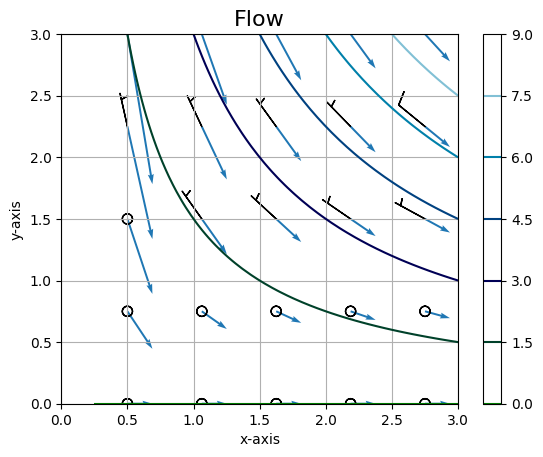

In [19]:
# Create the domain of the density field, denoted as rho.
X = np.linspace(0.25,3,num=50)
Y = np.linspace(0,3,num=50)
X, Y = np.meshgrid(X,Y)

# Create the domain of the position vector r.
t = np.linspace(0,3,num=100)

# Create the domain of the velocity field v.
X_v = np.linspace(0.5,2.75,num=5)
Y_v = np.linspace(0,3,num=5)
X_v, Y_v = np.meshgrid(X_v,Y_v)

# Define the functions.
rho = X*Y
v = (np.ones(X_v.shape),-Y_v/X_v)
rho_F = X_v*Y_v
F = (rho_F*v[0],rho_F*v[1])

# Create the figure and axes.
fig, ax = plt.subplots()
ax.set_title('Flow',size=16)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xlim = ax.set_xlim(0,3)
ylim = ax.set_ylim(0,3)
ax.grid()

# Plot the fields and motion(s).
cmap = mpl.colormaps['ocean']
cs = ax.contour(X,Y,rho,levels=6,cmap=cmap)
cb = fig.colorbar(cs)

ax.quiver(X_v,Y_v,*v,angles='uv',scale=4,scale_units='inches', \
          width = 0.005,units='width',color='tab:blue')
ax.barbs(X_v,Y_v,*F)

Now, how do we derive $\varphi$ from $\mathbf{v}$?  First, let:  

$$ \big(X(x,y,t),Y(x,y,t)\big) := \varphi(x,y,t) \quad\quad \text{and}\quad\quad \mathbf{r}(t\vert x_0,y_0) := \big\langle X(x_0,y_0,t),Y(x_0,y_0,t)\big\rangle = \langle \varphi(x_0,y_0,t)\rangle$$

Here $\mathbf{r}(t\vert x,y)$ is the position vector that tracks the movement of a particle of the flow that starts at $(x,y)$ at a time of $t=0$.  It might be useful to recall that, assuming continuity,  

\begin{equation}\tag{2}
    \varphi(x,y,0) = (x,y)
\end{equation}

Let $\mathbf{r}:=\mathbf{r}(t\vert x_0,y_0)$.  

$$ \frac{\mathrm{d}\mathbf{r}}{\mathrm{d} t} = \mathbf{r}'(t\vert x,y) = \mathbf{v}(\mathbf{r},t) =$$

where  

$$ X := X(x,y,t) \quad\quad\text{and}\quad\quad Y:=Y(x,y,t)$$